In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import newton

#import system

# Flux for a given configuration

## As a function of $\delta C_1$

In [2]:
class flux :
    def __init__(self, dC1, dC2, P1, P2, chis, chiv, ca, ellt, L) :
        self.dC1 = dC1
        self.dC2 = dC2
        self.P1 = P1
        self.P2 = P2
        self.chis = chis
        self.chiv = chiv
        self.ca = ca
        self.ellt = ellt
        self.L = L
        self.x_var = 'dC1'
    
    def __j1v__(self) :
        return system.func_J1v(dC1=self.dC1, dC2=self.dC2, P1=self.P1, P2=self.P2, chis=self.chis, chiv=self.chiv, ca=self.ca, ellt=self.ellt, L=self.L)
    
    def __j2v__(self) :
        return system.func_J2v(dC1=self.dC1, dC2=self.dC2, P1=self.P1, P2=self.P2, chis=self.chis, chiv=self.chiv, ca=self.ca, ellt=self.ellt, L=self.L)
    
    def __j1s__(self) :
        return system.func_J1s(dC1=self.dC1, dC2=self.dC2, chis=self.chis, ca=self.ca, ellt=self.ellt, L=self.L)

    def __j2s__(self) :
        return system.func_J2s(dC1=self.dC1, dC2=self.dC2, chis=self.chis, ca=self.ca, ellt=self.ellt, L=self.L)
    
    
    def __j1v_dC1__(self, x) :
        return system.func_J1v(x, dC2=self.dC2, P1=self.P1, P2=self.P2, chis=self.chis, chiv=self.chiv, ca=self.ca, ellt=self.ellt, L=self.L)
            
    def __j2v_dC1__(self) :
        return system.func_J2v(self.x, dC2=self.dC2, P1=self.P1, P2=self.P2, chis=self.chis, chiv=self.chiv, ca=self.ca, ellt=self.ellt, L=self.L)
    
    
    
    def __plot_fluxes__(self, x_val, xlabel) :
        fig, ax = plt.subplots(1, 2, figsize=(14,4))
        x = x_val
        
        if xlabel == 'dC1' :
            title = r'$\delta C_2$='+str(self.dC2)+' ; $P_1$='+str(self.P1)+' ; $P_2$='+str(self.P2)+'\n$\chi_v$='+str(self.chiv)+' ; $\chi_s$='+str(self.chis)+' ; $c_a$='+str(self.ca)+' ; $\ell$='+str(self.ellt)+' ; $L_0$='+str(self.L)
            
        elif xlabel == 'dC2' :
            title = r'$\delta C_1$='+str(self.dC1)+' ; $P_1$='+str(self.P1)+' ; $P_2$='+str(self.P2)+'\n$\chi_v$='+str(self.chiv)+' ; $\chi_s$='+str(self.chis)+' ; $c_a$='+str(self.ca)+' ; $\ell$='+str(self.ellt)+' ; $L_0$='+str(self.L)    
        
        elif xlabel == 'P1' :
            title = r'$\delta C_1$='+str(self.dC1)+' ; $\delta C_@$='+str(self.dC2)+' ; $P_2$='+str(self.P2)+'\n$\chi_v$='+str(self.chiv)+' ; $\chi_s$='+str(self.chis)+' ; $c_a$='+str(self.ca)+' ; $\ell$='+str(self.ellt)+' ; $L_0$='+str(self.L)
        
        elif xlabel == 'P2' :
            title = r'$\delta C_1$='+str(self.dC1)+' ; $\delta C_2$='+str(self.dC2)+' ; $P_1$='+str(self.P1)+'\n$\chi_v$='+str(self.chiv)+' ; $\chi_s$='+str(self.chis)+' ; $c_a='+str(self.ca)+' ; $\ell$='+str(self.ellt)+' ; $L_0$='+str(self.L)
        
        elif xlabel == 'chis' :
            title = r'$\delta C_1$='+str(self.dC1)+' ; $\delta C_2$='+str(self.dC2)+' ; $P_1$='+str(self.P1)+' ; $P_2$='+str(self.P2)+'\n$\chi_v$='+str(self.chiv)+' ; $c_a$='+str(self.ca)+' ; $\ell$='+str(self.ellt)+' ; $L_0$='+str(self.L)
        
        elif xlabel == 'chiv' :
            title = r'$\delta C_1$='+str(self.dC1)+' ; $\delta C_2$='+str(self.dC2)+' ; $P_1$='+str(self.P1)+' ; $P_2$='+str(self.P2)+'\n$\chi_s$='+str(self.chis)+' ; $c_a$='+str(self.ca)+' ; $\ell$='+str(self.ellt)+' ; $L_0$='+str(self.L)
        
        
        plt.suptitle(title, y=1.05, fontsize=15)

        ax[0].plot(x, self.__j1v__(), label = 'J1v', color='r', linewidth=2)
        ax[0].plot(x, self.__j2v__(), label = 'J2v', color = 'b', linewidth=2)
        ax[0].plot(x, self.__j2v__()-self.__j1v__(), label = 'J2v-J1v', color = 'purple', linewidth=2)
        ax[0].set_xlabel(str(xlabel), fontsize=12)
        ax[0].set_ylabel('Jv', fontsize=15)
        ax[0].legend()
        ax[0].grid()

        ax[1].plot(x, self.__j1s__(), label = 'J1s', color='r', linewidth=2, linestyle='--')
        ax[1].plot(x, self.__j2s__(), label = 'J2s', color='b', linewidth=2, linestyle='--')
        ax[1].set_xlabel(str(xlabel), fontsize=12)
        ax[1].set_ylabel('Js', fontsize=15)
        ax[1].legend()
        ax[1].grid()
        return 0
        
    #def __zero__(self) :
    #    

In [3]:
nb_pts = 101

dC1 = np.linspace(-5.,5, nb_pts)
fl = flux(dC1=dC1, dC2=0., P1=1., P2=1., chis=10., chiv=10., ca=0., ellt=0.5, L=1)
fl.x = dC1

NameError: name 'system' is not defined

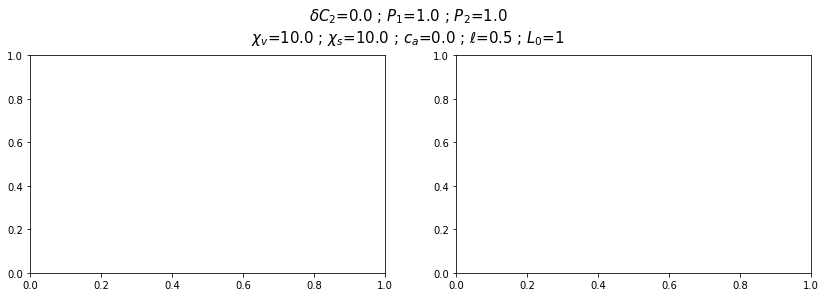

In [4]:
fl.__plot_fluxes__(x_val=fl.dC1, xlabel='dC1')

# Zero Flux

In [37]:
def Lambda(chis, chiv) :
    c1, s1 = np.cosh(1./chis), np.sinh(1./chis)
    if chis == chiv :
        return np.cosh(0.5/chiv) * (1 - chiv*s1) / (2*chiv*s1) 
    return chis*(chis*s1*np.cosh(0.5/chiv) - chiv*(1.+c1)*np.sinh(0.5/chiv)) / (s1 * (chiv**2 - chis**2))

def zero_Jv_DelP(DelC, chis, chiv) :
    return -DelC*Lambda(chis, chiv) /np.cosh(0.5/chiv)


def asymmetric_curve(Xs, Xv, dC_max = 5., nb_pts=101) :
    # RIGHT PART
    dC2_right = np.linspace(1, dC_max, nb_pts)
    dC1_right = 1
    DelC_right = dC2_right - dC1_right

    P1_right = 1

    DelP_right = zero_Jv_DelP(DelC_right, Xs, Xv)
    
    P2_right = DelP_right + P1_right
    
    Asym_dC_right = (dC2_right-dC1_right)/(dC2_right+dC1_right)
    Asym_dP_right = (P2_right-P1_right)/(P2_right+P1_right)
    
    # LEFT PART
    dC1_left = np.linspace(1, dC_max, nb_pts)
    dC2_left = 1
    DelC_left = dC2_left - dC1_left

    P2_left = 1

    DelP_left = zero_Jv_DelP(DelC_left, Xs, Xv)
    
    P1_left = P2_left - DelP_left

    Asym_dC_left = (dC2_left-dC1_left)/(dC2_left+dC1_left)
    Asym_dP_left = (P2_left-P1_left)/(P2_left+P1_left)
    
    # CONCATENATE
    Asym_dC = np.concatenate((Asym_dC_left[::-1], Asym_dC_right))
    Asym_dP = np.concatenate((Asym_dP_left[::-1], Asym_dP_right))
    return Asym_dC, Asym_dP

c_list = ['#037bfc', '#1403fc', '#2580c2', 
          '#ff4800', '#c71e1e', '#ff7c1f',
          '#00bf03', '#24bd54', '#5dba16']
lst = ['-', '--', '-.', '..']

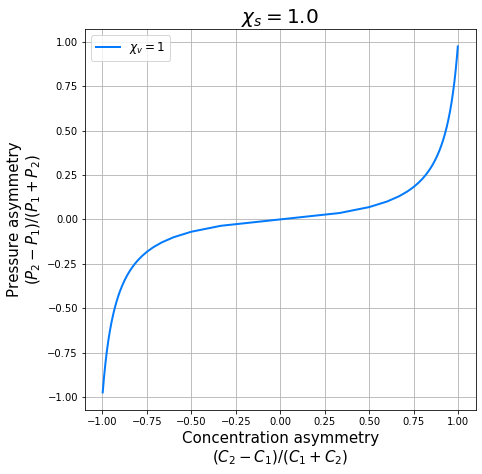

In [38]:
chis_list, chiv_list = [1.], [1]
plt.figure(figsize=(7, 7))
c=0
for i in range(len(chis_list)) :
    ls = lst[i]
    for j in range(len(chiv_list)) :
        Asym_dC, Asym_dP = asymmetric_curve(Xs=chis_list[i], Xv=chiv_list[j], dC_max=1000., nb_pts=1001)
        plt.plot(np.copy(Asym_dC), np.copy(Asym_dP), label = r'$\chi_v=$' +str(chiv_list[j]), linewidth=2, color=c_list[c], linestyle=ls)
        c+=3
        
plt.legend(loc='upper left', fontsize=12)
plt.grid()
plt.xlabel('Concentration asymmetry\n'+r'$(C_2 - C_1) / (C_1 + C_2)$', fontsize=15)
plt.ylabel('Pressure asymmetry\n'+r'$(P_2 - P_1) / (P_1 + P_2)$', fontsize=15)
plt.title('$\chi_s = '+str(chis_list[0])+'$', fontsize=20)
#plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/zero_flux_hydraulic_analyticsolution.eps', format='eps', dpi=100)
plt.show()



In [10]:
def Lambda(chis, chiv) :
    c1, s1 = np.cosh(1./chis), np.sinh(1./chis)
    if chis == chiv :
        return np.cosh(0.5/chiv) * (1 - chiv*s1) / (2*chiv*s1) 
    return chis*(chis*s1*np.cosh(0.5/chiv) - chiv*(1.+c1)*np.sinh(0.5/chiv)) / (s1 * (chiv**2 - chis**2))

def zero_Jv_DelP(DelC, chis, chiv) :
    return -DelC*Lambda(chis, chiv) /np.cosh(0.5/chiv)


def asymmetric_curve_chi(Xs, Xv, nb_pts=101) :
    return 1

c_list = ['#037bfc', '#1403fc', '#2580c2', 
          '#ff4800', '#c71e1e', '#ff7c1f',
          '#00bf03', '#24bd54', '#5dba16']
lst = ['-', '--', '-.', '..']

In [99]:
P1, P2 = 2., 1.

delta_P = (P2-P1)/(P1+P2)
print(delta_P)

-0.3333333333333333


In [100]:
chiv_list = np.logspace(-2, 2, 101)
chis = 1.



In [117]:
# Right part
C1 = 1.
delC = np.array([(P2-P1)*np.cosh(1./chiv_list[i])/Lambda(chis, chiv_list[i]) for i in range(len(chiv_list))])
C2 = C1 + delC
Delta_C_right = delC / (C1+C2)

# Right part
C2 = 1.
delC = np.array([(P2-P1)*np.cosh(1./chiv_list[i])/Lambda(chis, chiv_list[i]) for i in range(len(chiv_list))])
C1 = C2 - delC
Delta_C_left = delC/(C1+C2)

In [118]:
Delta_C_left

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.00000002, -1.00000012, -1.00000051, -1.00000193,
       -1.00000643, -1.00001924, -1.00005221, -1.0001295 , -1.00029598,
       -1.00062766, -1.00124305, -1.00231265, -1.00406392, -1.00677882,
       -1.01078221, -1.01642088, -1.0240343 , -1.03391885, -1.04628825,
       -1.0612325 , -1.07867853, -1.0983564 , -1.11977664, -1.14222533,
       -1.16478469, -1.1863845 , -1.20588606, -1.22219201, -1.23436766,
       -1.24175207, -1.24403634, -1.2412919 , -1.23394335, -1.2226939 ,
       -1.20842165, -1.19206928, -1.1745467 , -1.15665928, -1.13906573,
       -1.12226328, -1.10659355, -1.09226173, -1.07936202, -1.06790437,
       -1.05783902, -1.04907737, -1.04150846, -1.03501126, -1.0294634 ,
       -1.02474696, -1.02075201, -1.01737848, -1.01453693, -1.01214853,
       -1.01014455, -1.00846557, -1.0070606 , -1.00588611, -1.00

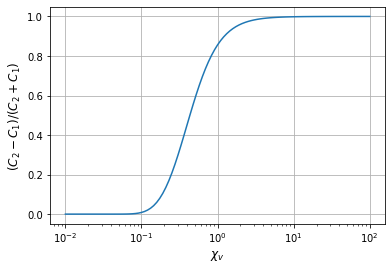

In [119]:
plt.xscale('log')
#plt.yscale('log')
plt.plot(chiv_list, Delta_C_right)
#plt.plot(chiv_list, Delta_C_left)
plt.xlabel(r'$\chi_v$', fontsize=12)
plt.ylabel(r'$(C_2-C_1)/(C_2+C_1)$', fontsize=12)
plt.grid()
plt.show()

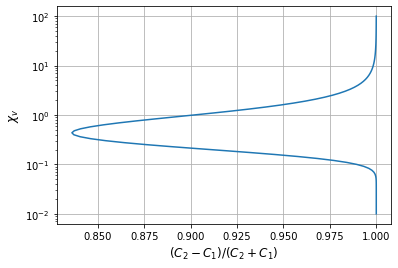

In [112]:
#plt.xscale('log')
plt.yscale('log')
plt.plot(Delta_C_right, chiv_list)

plt.ylabel(r'$\chi_v$', fontsize=12)
plt.xlabel(r'$(C_2-C_1)/(C_2+C_1)$', fontsize=12)
plt.grid()
plt.show()